<a href="https://colab.research.google.com/github/singhpratham19/mba-placement-analysis/blob/main/placement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir()

['.config', 'mba_placement_dataset.csv', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("mba_placement_dataset.csv")
df.head()

,Gender,MBA_Stream,Work_Experience,CGPA,Entrance_Exam_Score,Placement_Status,Salary,Company
0,Male,Business Analytics,Yes,6.52,56.4,Placed,628821.0,Deloitte
1,Female,Business Analytics,No,5.93,97.5,Not Placed,NaN,Not Applicable
2,Male,Marketing,Yes,6.55,72.2,Not Placed,NaN,Not Applicable
3,Male,HR,Yes,8.61,61.6,Placed,383555.0,ICICI Bank
4,Male,Finance,Yes,9.18,53.6,Placed,476806.0,Flipkart


In [ ]:
df.shape

(500, 8)

In [ ]:
df.columns

Index(['Gender', 'MBA_Stream', 'Work_Experience', 'CGPA',
       'Entrance_Exam_Score', 'Placement_Status', 'Salary', 'Company'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               500 non-null    object 
 1   MBA_Stream           500 non-null    object 
 2   Work_Experience      500 non-null    object 
 3   CGPA                 500 non-null    float64
 4   Entrance_Exam_Score  500 non-null    float64
 5   Placement_Status     500 non-null    object 
 6   Salary               362 non-null    float64
 7   Company              500 non-null    object 
dtypes: float64(3), object(5)
memory usage: 31.4+ KB


In [ ]:
df.isnull().sum()

,0
Gender,0
MBA_Stream,0
Work_Experience,0
CGPA,0
Entrance_Exam_Score,0
Placement_Status,0
Salary,138
Company,0


In [ ]:
df['Placed_Flag'] = df['Placement_Status'].map({'Placed':1, 'Not Placed':0})
df[['Placement_Status','Placed_Flag']].head()

,Placement_Status,Placed_Flag
0,Placed,1
1,Not Placed,0
2,Not Placed,0
3,Placed,1
4,Placed,1


In [ ]:
df.describe()

,CGPA,Entrance_Exam_Score,Salary,Placed_Flag
count,500.000000,500.000000,3.620000e+02,500.000000
mean,7.684960,74.533400,9.032692e+05,0.724000
std,1.271311,14.219364,3.406902e+05,0.447464
min,5.530000,50.200000,3.001590e+05,0.000000
25%,6.547500,61.600000,6.038802e+05,0.000000
50%,7.745000,75.200000,9.102245e+05,1.000000
75%,8.802500,86.125000,1.171736e+06,1.000000
max,9.790000,99.000000,1.499151e+06,1.000000


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,256
Male,244


In [ ]:
df.columns

Index(['Gender', 'MBA_Stream', 'Work_Experience', 'CGPA',
       'Entrance_Exam_Score', 'Placement_Status', 'Salary', 'Company',
       'Placed_Flag'],
      dtype='object')

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,256
Male,244


In [ ]:
df['MBA_Stream'].value_counts()

,count
MBA_Stream,
Business Analytics,114
Finance,110
Marketing,99
Operations,91
HR,86


In [ ]:
df['Work_Experience'].value_counts()

,count
Work_Experience,
Yes,262
No,238


In [ ]:
df['Placement_Status'].value_counts()

,count
Placement_Status,
Placed,362
Not Placed,138


In [ ]:
df[df['Placed_Flag'] == 1]['Salary'].describe()

,Salary
count,3.620000e+02
mean,9.032692e+05
std,3.406902e+05
min,3.001590e+05
25%,6.038802e+05
50%,9.102245e+05
75%,1.171736e+06
max,1.499151e+06


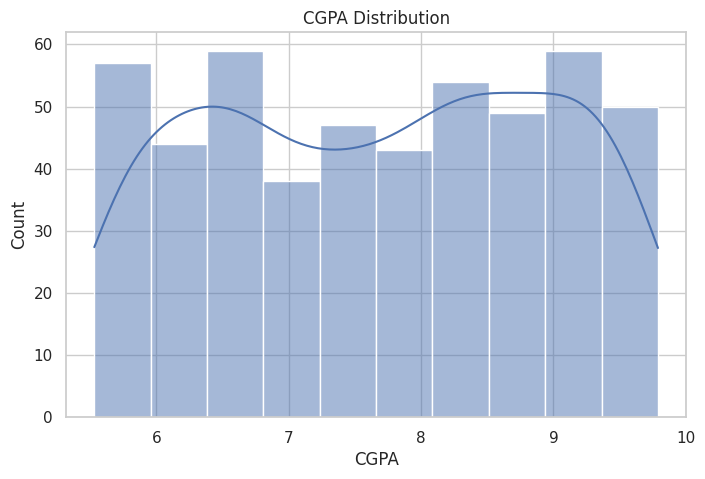

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['CGPA'], kde=True)
plt.title("CGPA Distribution")
plt.show()

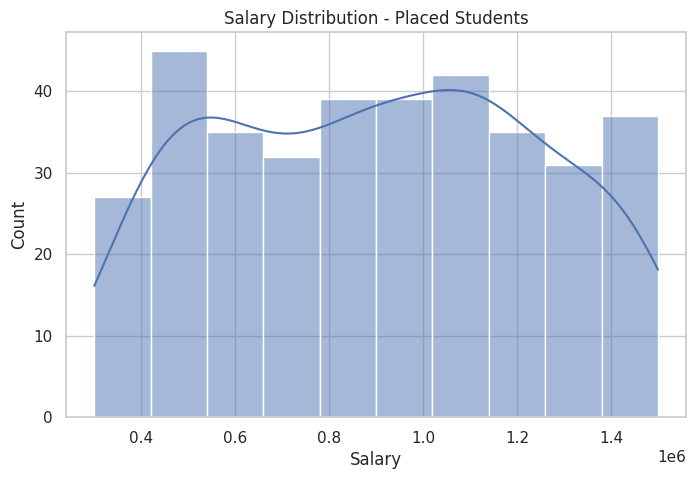

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Placed_Flag']==1]['Salary'], kde=True)
plt.title("Salary Distribution - Placed Students")
plt.show()

In [ ]:
df.groupby('Gender')['Placed_Flag'].mean()

,Placed_Flag
Gender,
Female,0.718750
Male,0.729508


In [ ]:
df.groupby('MBA_Stream')['Placed_Flag'].mean().sort_values(ascending=False)

,Placed_Flag
MBA_Stream,
Finance,0.745455
Business Analytics,0.736842
Operations,0.736264
HR,0.720930
Marketing,0.676768


In [ ]:
df.groupby('Work_Experience')['Placed_Flag'].mean()

,Placed_Flag
Work_Experience,
No,0.747899
Yes,0.702290


In [ ]:
df.groupby('MBA_Stream')['Salary'].mean().sort_values(ascending=False)

,Salary
MBA_Stream,
HR,933133.774194
Finance,924726.597561
Operations,896798.388060
Marketing,884536.119403
Business Analytics,880382.690476


In [ ]:
df.groupby('Company')['Salary'].mean().sort_values(ascending=False)

,Salary
Company,
Amazon,973507.523810
KPMG,968608.193548
Accenture,963170.477273
HDFC Bank,956272.764706
ICICI Bank,952747.416667
EY,900589.933333
Infosys,861070.800000
Deloitte,853496.868421
Flipkart,851002.729730


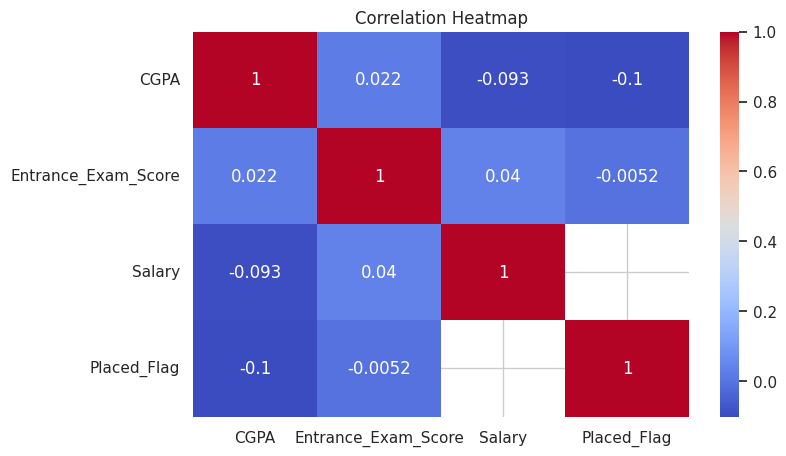

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['CGPA','Entrance_Exam_Score','Salary','Placed_Flag']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

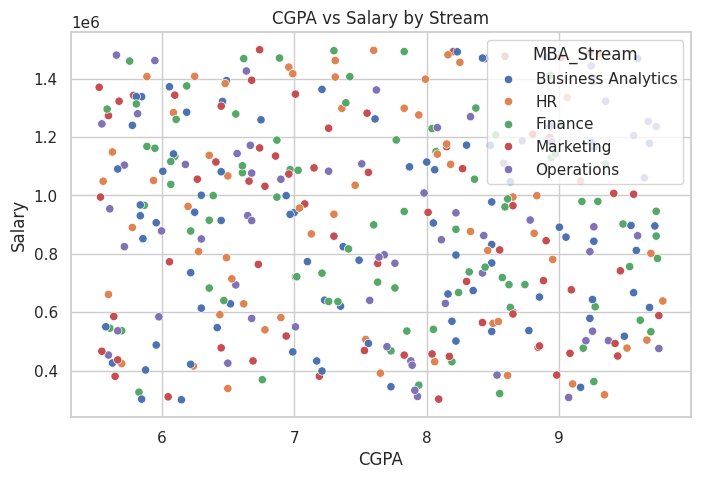

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df[df['Placed_Flag']==1], x='CGPA', y='Salary', hue='MBA_Stream')
plt.title("CGPA vs Salary by Stream")
plt.show()

In [ ]:
df[['Entrance_Exam_Score', 'Placed_Flag']].corr()

,Entrance_Exam_Score,Placed_Flag
Entrance_Exam_Score,1.000000,-0.005194
Placed_Flag,-0.005194,1.000000


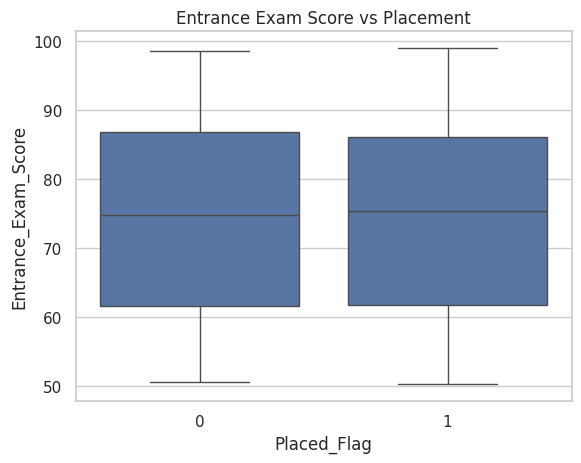

In [ ]:
sns.boxplot(data=df, x='Placed_Flag', y='Entrance_Exam_Score')
plt.title("Entrance Exam Score vs Placement")
plt.show()

In [ ]:
df.to_csv("mba_placement_cleaned.csv", index=False)

In [ ]:
from google.colab import files
files.download("mba_placement_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>